## Auto-mpg Linear Regression

(Data Science Fall 2018)

Build, describe, and use a linear regression model that estimates the target variable `mpg` for the accompanying auto data set. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import models 

sns.set(style="whitegrid")

In [4]:
data = pd.read_table('auto-mpg.data.txt', sep="\s+", names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                                                             'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


horsepower shouldn't be an object. 

In [7]:
data.horsepower.value_counts()

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
95.00    14
75.00    14
70.00    12
67.00    12
105.0    12
65.00    10
97.00     9
85.00     9
80.00     7
140.0     7
145.0     7
?         6
68.00     6
92.00     6
84.00     6
72.00     6
78.00     6
71.00     5
60.00     5
86.00     5
180.0     5
115.0     5
170.0     5
130.0     5
175.0     5
         ..
82.00     1
66.00     1
132.0     1
135.0     1
149.0     1
220.0     1
158.0     1
61.00     1
103.0     1
138.0     1
94.00     1
167.0     1
122.0     1
113.0     1
93.00     1
49.00     1
152.0     1
148.0     1
208.0     1
193.0     1
89.00     1
91.00     1
137.0     1
108.0     1
116.0     1
64.00     1
142.0     1
77.00     1
54.00     1
102.0     1
Name: horsepower, Length: 94, dtype: int64

There is a "?" so we will change to a NA value

In [8]:
data = pd.read_table('auto-mpg.data.txt', sep="\s+", names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                                                             'weight', 'acceleration', 'model_year', 'origin', 'car_name'], na_values = '?')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


This seems to have worked. However, now we gotta figure how many values we are missing and either replace or delete 

In [10]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
data[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


We have 6 cars with missing horsepower. Since my husband loves cars I just asked him to look up the info. 
Information was found in wikipedia and http://automobile-catalog.com 

In [12]:
data.horsepower[32] = 100
data.horsepower[126] = 126
data.horsepower[330] = 51
data.horsepower[336] = 131
data.horsepower[354] = 81
data.horsepower[374] = 82

In [13]:
data[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


Looks like we are good now. Let's call the describe function

In [14]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.329146,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.366780,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.750000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Great! 
Let's check how the mpg variable looks like

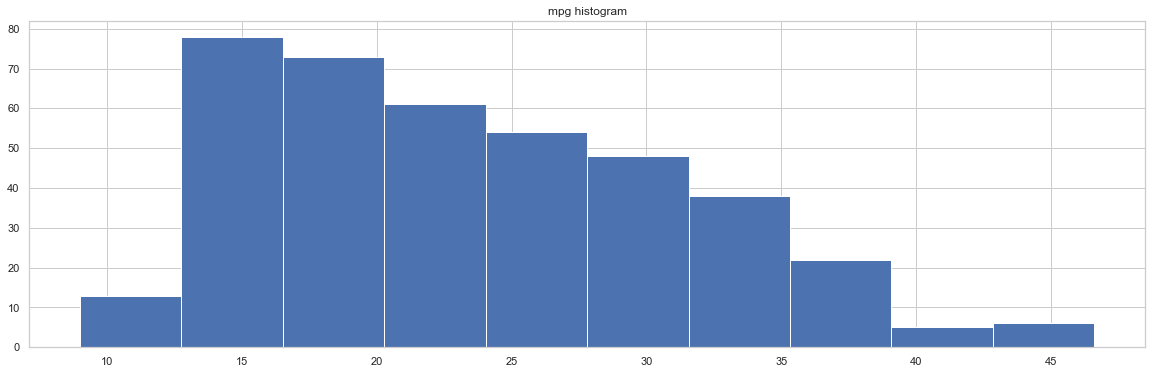

In [15]:
figure = plt.figure(figsize = (20,6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data.mpg)
axes. set_title("mpg histogram")
plt.show()

It is not normally distributed. Let's see what we can do. 

Let's check correlations first

Before moving on I need to decide what I should expect from each variable:
* cylinders: The more cylinders, the less mpg so this should have a negative relationship
* displacement: The more cylinders, the more displacement. The more displacement, the more fuel to burn and therefore it would affect mpg. So this should also have a negative relationship
* horsepower: Horsepower should affect mpg in a negative way so expect it to be negative
* weight: The heavier the vehicle the more work it would have to do, so also expect it to be negative
* acceleration: expected to be positive. The lower the acceleration number, the lower the mpg since it is doing work to move mass a certain distance over time. 
* model_year : It shouldn't have a big impact on mpg, maybe the newer the car then the better it should be at mpg, so expect it to be positive
* origin : I am unclear what this means so not sure what to expect. 

In [16]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

In [17]:
correlations(data, 'mpg', ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'])

,feature,r,rho
0,cylinders,-0.775396,-0.821864
1,displacement,-0.804203,-0.855692
2,horsepower,-0.778436,-0.851891
3,weight,-0.831741,-0.874947
4,acceleration,0.420289,0.438677
5,model_year,0.579267,0.573469
6,origin,0.563450,0.580694


Results:
1. cylinders - negative slight linear relationship with also decreasing monotonic relationship
2. displacement - same as cylinders, negative slight linear and monotonic decreasing relationship
3. horsepower - slight linear  negative relationship and monotonic decreasing relationship
4. weight - slightly more linear relationship than other variables. Also decreasing monotonic relationship
5. acceleration - It doesn't have as big of a relationship as the other variables and Spearman shows some increasing monotonic relationship
6. model_year - not a huge relationship neither from Pearson or Spearman. They are actually very similar
7. origin - same as model_year, not a great relationship but not the one with the least either. I wasn't sure what to expect in this one so now we know is positive

Notice that I omitted car_name since I think its just a title/name for a car. The other variables are the ones that are going to influence the model and not the name of the car. I am going to skip model_year and origin for now since what should really affect the mpg is the other characteristics but model_year might have something to do

Let's see where the first 5 variables take us. 

In [18]:
model = "mpg ~ cylinders + displacement + horsepower + weight + acceleration"
result1 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result1)

$R^2$ looks  good with 71%. The error is down to 4.25 from 23.51 in Null model. 

* The intercept ($\beta_0$) is not very important here since none of the variables would be equal to 0 but it is positive
* cylinders shows negative but that would make sense since I expected a negative relationship. It has mixed support in data
* displacement is negative zero(not worried yet since it has nonzero values in 95% BCI) and with mixed support. I expected it to be negative so this is not as surprising. Considering that it might have some correlation with cylinders, it might be worth exploring interaction terms here. It has good support of the data.
* horsepower - it is negative and good support
* weight - very close to zero and negative. No surprise
* acceleration - This one is surprising since I expected it to be positive. 

In [19]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,6))

    variables = ["cylinders", "displacement", "horsepower", "weight", 'acceleration']

    plots = len( variables)
    rows = (plots // 5) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(data[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

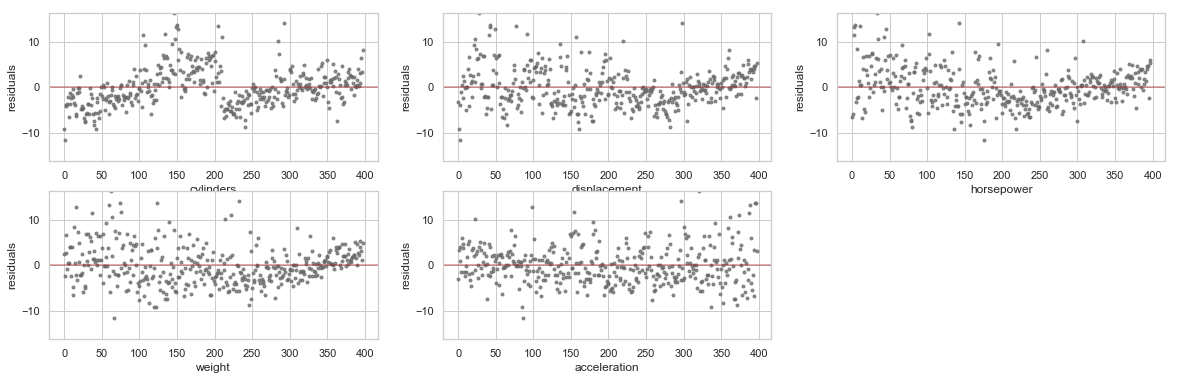

In [20]:
residuals1 = plot_residuals(result1, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

Cylinders looks interesting. There is some pattern here. Displacement, horsepower and weight have a slight curve, so a squared transformation might be useful here. First let's look at a log transformation for mpg since we saw earlier that it could benefit from one.

In [21]:
data['log_mpg'] = data['mpg'].apply(np.log)

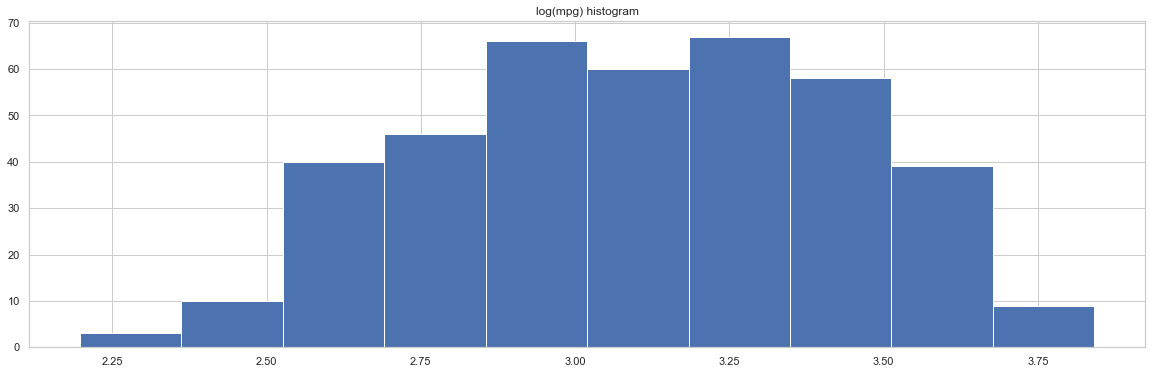

In [22]:
figure = plt.figure(figsize = (20,6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data.log_mpg)
axes. set_title("log(mpg) histogram")
plt.show()

Not very normal. Somewhat symmetric. Let's try it in the model

In [23]:
model = "log_mpg ~ cylinders + displacement + horsepower + weight + acceleration"
result2 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result2)

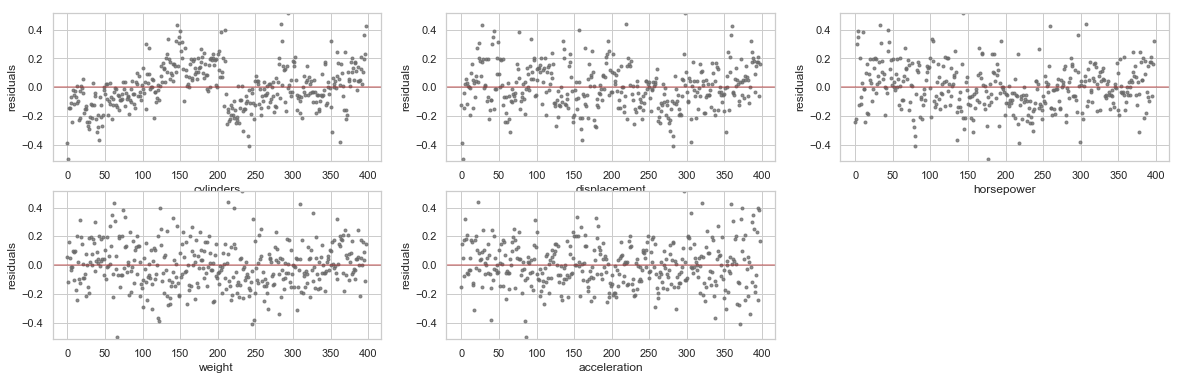

In [24]:
residuals2 = plot_residuals(result2, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

For comparison

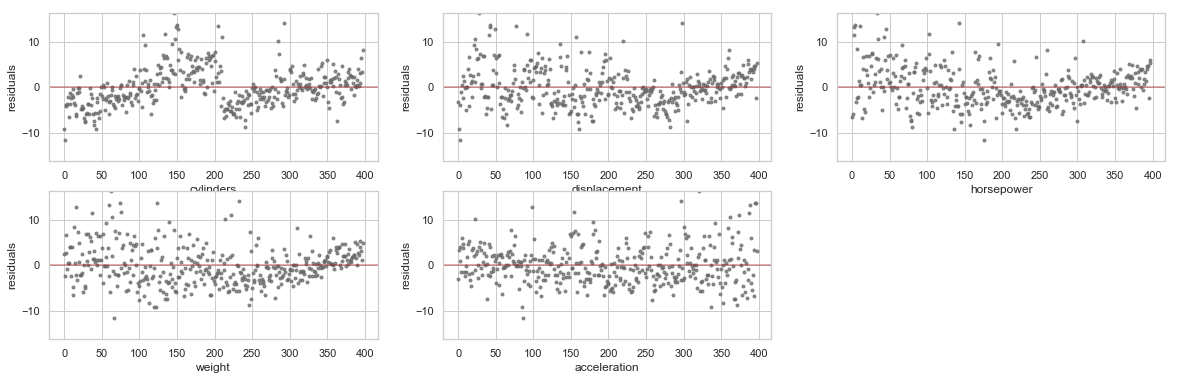

In [25]:
residuals1 = plot_residuals(result1, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

Interesting results. $R^2$ and the error improved. The intercept is still positive but displacement, horsepower and weight are zero. Not sure what to do with this.  

The displacement, horsepower and weight don't show that curve anymore and the residuals are closer to zero so I don't think a squared transformation would be necessary if decide to keep the log transformation on mpg.

Let's look at the histograms for residuals of the log transformation and the variable without transformation

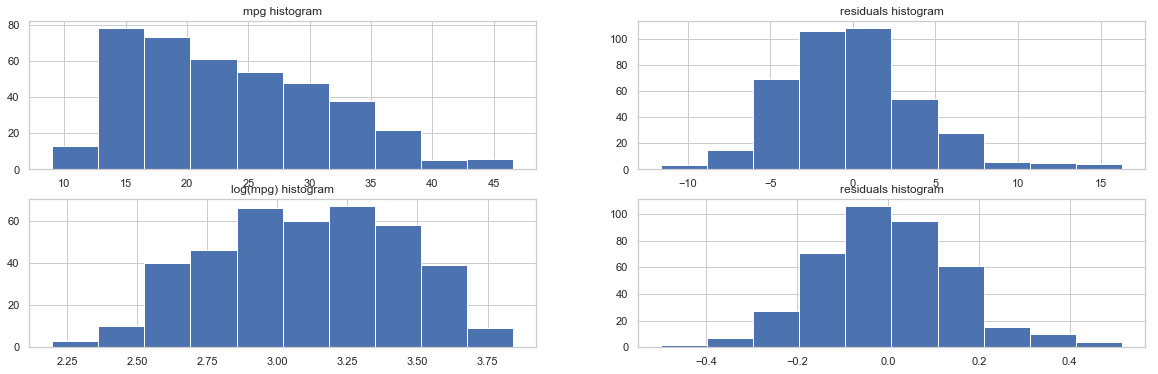

In [26]:
figure = plt.figure(figsize = (20,6))
axes = figure.add_subplot(2, 2, 1)
axes.hist(data.mpg)
axes. set_title("mpg histogram")

axes = figure.add_subplot(2, 2, 2)
axes.hist(residuals1)
axes. set_title("residuals histogram")

axes = figure.add_subplot(2, 2, 3)
axes.hist(data.log_mpg)
axes. set_title("log(mpg) histogram")

axes = figure.add_subplot(2, 2, 4)
axes.hist(residuals2)
axes. set_title("residuals histogram")
plt.show()

The residuals look more symmetric with the log transformation and $R^2$ and error did improve. So we very tempted to keep the transformation of mpg, and see where it takes us.

Let's check the adjusted r squared

In [27]:
print(models.adjusted_r_squared(result1))
print(models.adjusted_r_squared(result2))

0.7023562358193343
0.7881540846368137


There is a big improvement in $R^2$ but those coefficients being equal to zero don't make sense. Since the residuals still looks normal with some skewness, I think I should keep the variable as is.
There is something going wit the cylinder's variable so let's explore the interaction with displacement

In [28]:
model = "mpg ~ cylinders + displacement + cylinders:displacement + horsepower + weight + acceleration"
result3 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result3)

Slight increase in $R^2$ and the error went down. Displacement, horsepower and interaction term coefficients are not zero anymore. Weight is but the interval still include a nonzero, so not worried yet.   
Let's see adjusted r squared

In [29]:
print(models.adjusted_r_squared(result1))
print(models.adjusted_r_squared(result3))

0.7023562358193343
0.7354835599922154


Improvement, let's look at residuals

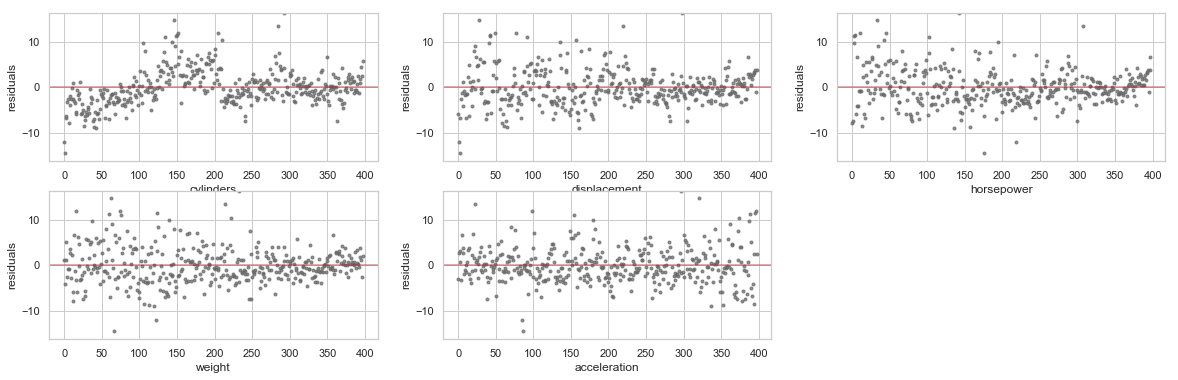

In [30]:
residuals3 = plot_residuals(result3, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

Comparing with the first model

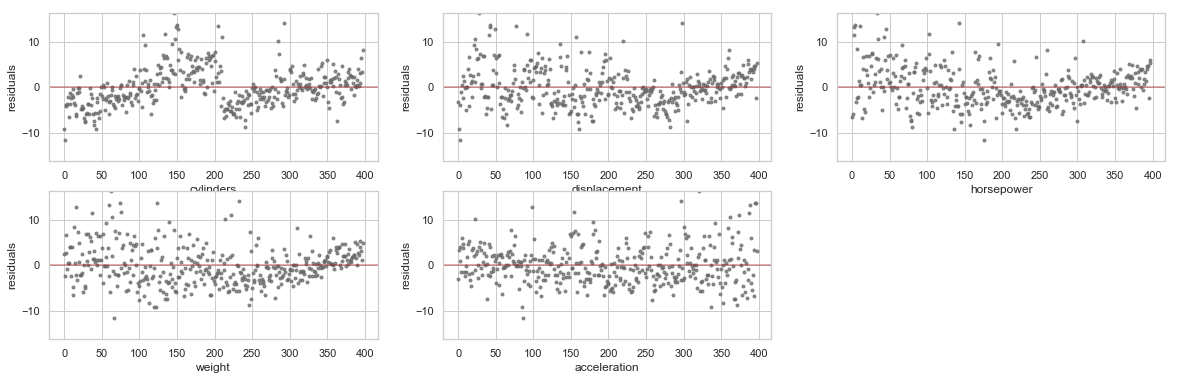

In [31]:
residuals1 = plot_residuals(result1, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

That looks like a an improvement. The curve for displacement, horsepower and weight seem to be gone but we do see that the smaller the values, the larger the errors. We'll come back to this. 
Cylinders still has a pattern. Since the more cylinder and/or displacement the more horsepower so let's try an interaction term

In [32]:
model = "mpg ~ cylinders + displacement + horsepower + cylinders:horsepower + weight + acceleration"
result4 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result4)

In [33]:
print(models.adjusted_r_squared(result1))
print(models.adjusted_r_squared(result4))

0.7023562358193343
0.754465118545727


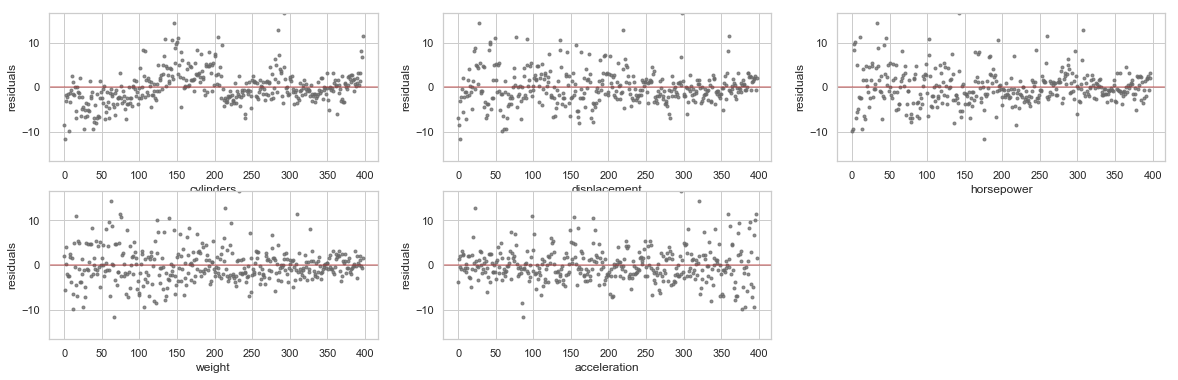

In [34]:
residuals4 = plot_residuals(result4, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

Slight improvement in $R^2$ compared to the interaction of displacement and cylinder. However, now the weight variable coefficient is zero and that doesn't make sense. The residual plots look very similar so no visible improvement there. Let's  try both interaction terms.

In [35]:
model = "mpg ~ cylinders + displacement + cylinders:displacement + horsepower + cylinders:horsepower + weight + acceleration"
result5 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result5)

In [36]:
print(models.adjusted_r_squared(result3))
print(models.adjusted_r_squared(result5))

0.7354835599922154
0.7538877777570733


Still see that weight coefficient equal to zero. There is an improvement in adjusted r_squared but it is still weird to see that weight coefficient equal to zero. So I'll remove the cylinders:horsepower interaction term. 

We have the model_year and origin still to use. So let's look if residuals are correlated with the model year

In [37]:
data['residuals'] = residuals3

In [38]:
correlations(data, 'residuals', ['model_year', 'origin'])

,feature,r,rho
0,model_year,0.565024,0.584298
1,origin,0.078499,0.011223


Let's add model_year

In [39]:
model = "mpg ~ cylinders + displacement + cylinders:displacement + horsepower  + weight + acceleration + model_year"
result6 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result6)

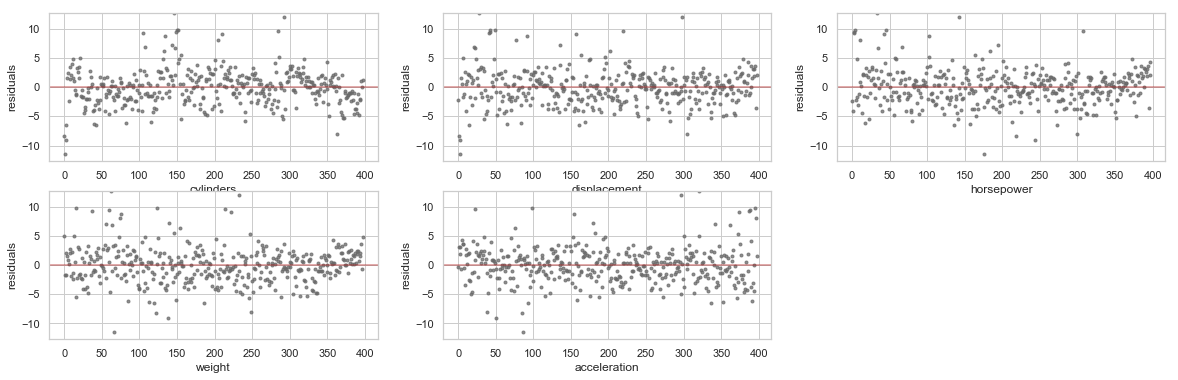

In [40]:
residuals6 = plot_residuals(result6, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

Compare:

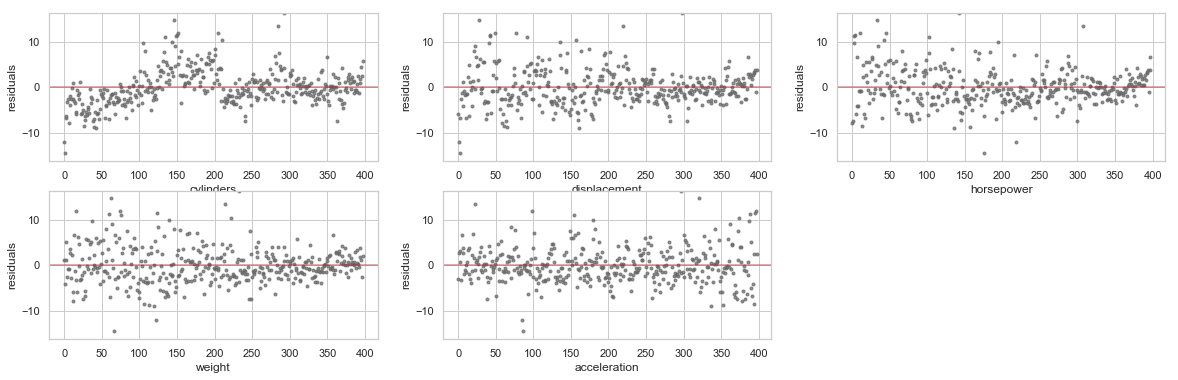

In [41]:
residuals3 = plot_residuals(result3, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

In [42]:
print(models.adjusted_r_squared(result3))
print(models.adjusted_r_squared(result6))

0.7354835599922154
0.8406623013039793


Great! The pattern on cylinders is gone. The residuals look much better. 

$R^2$ and error look really good. 
Based on $R^2$ I think this is the best we can do. Now we need to figure out what to do with all the coefficients. Let's look at the coefficients:

* cylinders : negative as expected and the credible interval doesn't include zero so we keep it
* displacement: negative as expected and it doesn't include 0. So this is a keep
* cylinder:displacement is expected so keep
* horsepower : negative as expected and it doesn't include zero so it is keep
* weight is negative as expected and it doesn't include zero so keep
* acceleration is positive which is expected. It includes zero so keep
* model year is positive and it proved to be of importance and well supported with the intervals so keep.

We still have the variable origin that we can add and see if it improves the model. 

In [43]:
model = "mpg ~ cylinders + displacement + cylinders:displacement + horsepower  + weight + acceleration + model_year + origin"
result7 = models.bootstrap_linear_regression(model, data = data)
models.describe_bootstrap_lr(result7)

In [44]:
print(models.adjusted_r_squared(result6))
print(models.adjusted_r_squared(result7))

0.8406623013039793
0.8429852306319676


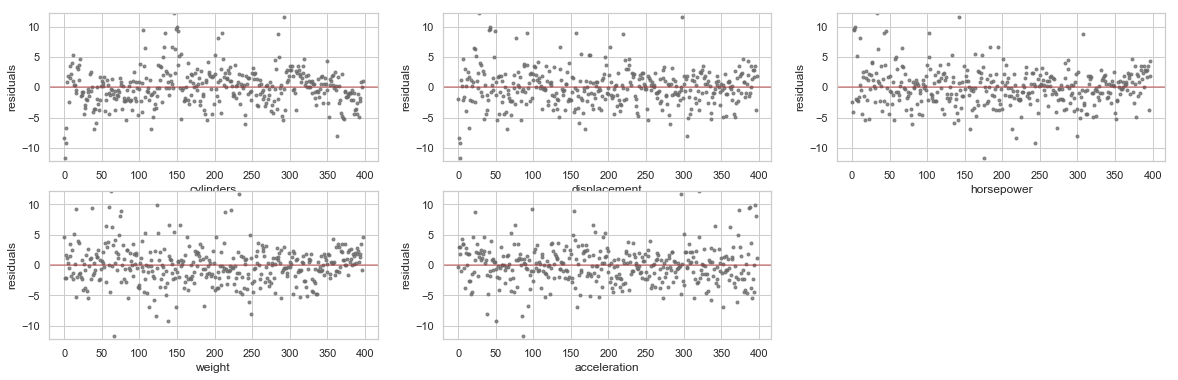

In [45]:
residuals7 = plot_residuals(result7, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

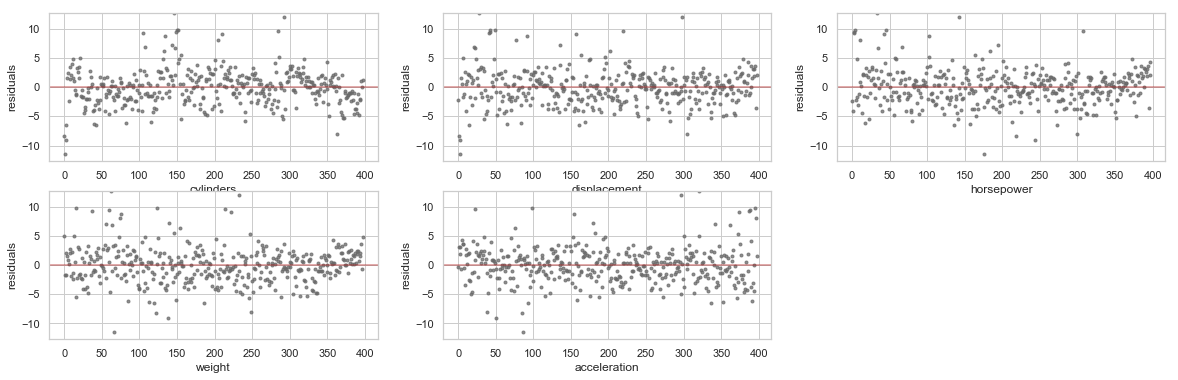

In [46]:
residuals6 = plot_residuals(result6, ["cylinders", "displacement", "horsepower", "weight", "acceleration"])

No notable difference in the residual plots. There is a very small increase in $R^2$, adjusted $R^2$ and a decrease in the error.  

We can leave this one as our final model since it shows some improvement, thought not in residual plots. 

In [47]:
predictions = {"cylinders": "-", "displacement": "-", "cylinders:displacement": "+", "horsepower":  "-", "weight": "-", "acceleration": "+", "model_year": "+", "origin": "+"}
models.evaluate_coefficient_predictions(predictions, result7)               

cylinders P(<0)=1.000 (strong)
displacement P(<0)=1.000 (strong)
cylinders:displacement P(>0)=1.000 (strong)
horsepower P(<0)=1.000 (strong)
weight P(<0)=1.000 (strong)
acceleration P(>0)=0.650 (mixed)
model_year P(>0)=1.000 (strong)
origin P(>0)=1.000 (strong)


Predictions look pretty good. 

There might be some more work to do here. There is a lot more stuff that goes into estimating mpg and the variables given are not enough features to determine this. 